In [17]:
import sys
sys.path.append('../')

import numpy as np
from scipy import ndimage

from skimage.filters import sobel_h
from skimage.filters import sobel_v
from scipy import stats


import os
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.proj3d import proj_transform
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d


import scienceplots
from tensorflow.python.client import device_lib

#plt.rcParams['figure.figsize'] = [10,10]

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications import VGG16

from tensorflow.nn import depthwise_conv2d
from tensorflow.math import multiply, reduce_sum, reduce_mean,reduce_euclidean_norm, sin, cos, abs
from tensorflow import stack, concat, expand_dims

import tensorflow_probability as tfp

from utils.utils import *
import cv2

from scipy import ndimage, fft
from io import BytesIO

plt.style.use(['science', 'ieee'])
plt.rcParams.update({'figure.dpi': '100'})

[[0.  0.  0. ]
 [0.5 0.5 0. ]
 [0.5 0.5 0. ]]
[[0.        0.        0.       ]
 [0.6830127 0.1830127 0.       ]
 [0.6830127 0.1830127 0.       ]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.07106781e-01 5.55111512e-17 0.00000000e+00]
 [7.07106781e-01 5.55111512e-17 0.00000000e+00]]
[[ 0.         0.         0.       ]
 [ 0.6830127 -0.1830127  0.       ]
 [ 0.6830127 -0.1830127  0.       ]]
[[ 0.   0.   0. ]
 [ 0.5 -0.5  0. ]
 [ 0.5 -0.5  0. ]]


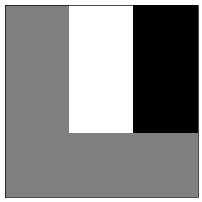

In [18]:

for beta2 in [0, 0.25, 0.5, 0.75, 1]:

    filters = np.zeros((3,3))



    t = np.zeros((2,2))
    t[0,1] = np.sqrt(beta2)
    t[0, 0] = np.sqrt(1-beta2)

    filters[1:,0:2] = fft.idctn(t, norm="ortho")
    print(filters)

    plt.imshow(filters, cmap='gray', vmin=-0.5, vmax=0.5)
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])  # Remove y-axis ticks\

    plt.grid(True)
    plt.savefig(f"kernels/k2_beta2_{beta2}_1.pdf")


    filters = np.zeros((3,3))

    filters[0:2,1:] = fft.idctn(t, norm="ortho")
    plt.imshow(filters, cmap='gray', vmin=-0.5, vmax=0.5)
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])  # Remove y-axis ticks
    plt.grid(True)
    plt.savefig(f"kernels/k2_beta2_{beta2}_2.pdf")


[[0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]]
[[0.49279928 0.28867513 0.08455099]
 [0.49279928 0.28867513 0.08455099]
 [0.49279928 0.28867513 0.08455099]]
[[ 0.52437739  0.23570226 -0.05297287]
 [ 0.52437739  0.23570226 -0.05297287]
 [ 0.52437739  0.23570226 -0.05297287]]
[[ 0.52022006  0.16666667 -0.18688672]
 [ 0.52022006  0.16666667 -0.18688672]
 [ 0.52022006  0.16666667 -0.18688672]]
[[ 0.40824829  0.         -0.40824829]
 [ 0.40824829  0.         -0.40824829]
 [ 0.40824829  0.         -0.40824829]]


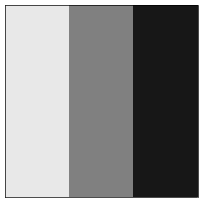

In [20]:

for beta2 in [0, 0.25, 0.5, 0.75, 1]:

    filters = np.zeros((3,3))



    t = np.zeros((3,3))
    t[0,1] = np.sqrt(beta2)
    t[0, 0] = np.sqrt(1-beta2)

    filters = fft.idctn(t, norm="ortho")
    print(filters)

    plt.imshow(filters, cmap='gray', vmin=-0.5, vmax=0.5)
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])  # Remove y-axis ticks\

    plt.grid(True)
    plt.savefig(f"kernels/k3_beta2_{beta2}.pdf")
